In [32]:
import numpy as np 
from numpy.random import geometric
import matplotlib.pyplot as plt
from scipy.stats import nbinom, iqr, norm, binom, rv_discrete,describe,pearsonr
import statistics
import math as math 
import seaborn as sns 
import pandas as pd 

from mpmath import mpf
from collections import defaultdict

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [2]:
def defective_calc(p,sum_of_prob):
    total=0
    i=1
    tot_calc=0

    while  tot_calc<sum_of_prob :
        my_calc=(p)*(1-p)**(i-1)

        tot_calc+=my_calc

        i+=1
    return print("We should ask {} samples in order to get  probability of {} with {} defective,sum of our calculation {}".format( i-1,sum_of_prob, p,tot_calc))


In [3]:

defective_calc(0.03, 0.85)

We should ask 63 samples in order to get  probability of 0.85 with 0.03 defective,sum of our calculation 0.8532360949640697


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [4]:

defective_calc(0.04, 0.95)

We should ask 74 samples in order to get  probability of 0.95 with 0.04 defective,sum of our calculation 0.9512391525501648


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [6]:
# 1C-1
#  for example if we want at least 5 sucsess - so we should calculate  1- p( 4 successes)
# r=4
# p=0.1


def func_c1(p,y,r):
    tot=0

    while tot<0.90:
        calc= ((math.factorial(y-1))/(math.factorial(r-1)*math.factorial((y-1)-(r-1))))*math.pow(1-p,y-r)*math.pow(p,r)

        tot+=calc
        y+=1

    return print(' Probability is  = {} for {} samples  and {} defective \n'.format(tot,y-1,r))

c1=func_c1(0.1,5,5)


c2=func_c1(0.3,15,15)



 Probability is  = 0.9006056767326895 for 78 samples  and 5 defective 

 Probability is  = 0.9025706028157232 for 64 samples  and 15 defective 



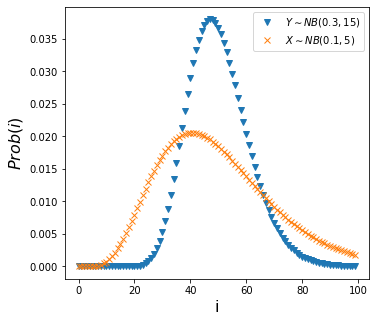

In [7]:
r1=5
r2=15
p1=0.1
p2=0.3

X=nbinom(r1,p1,loc=r1)
Y=nbinom(r2,p2,loc=r2)

i1=range(0,int(np.round(2*r1/p1,0)))
i2=range(0,int(np.round(2*r2/p2,0)))

P_X=X.pmf(i1)
P_Y=Y.pmf(i2)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(i2, P_Y, 'v', label="$Y\sim NB({{{0}}},{{{1}}})$".format(p2,r2))
plt.plot(i1, P_X, 'x', label="$X\sim NB({{{0}}},{{{1}}})$".format(p1,r1))
plt.xlabel('i', fontsize=16)
plt.ylabel('$Prob(i)$', fontsize=16)
plt.legend()
plt.show()

In [8]:
# calculation of variance and std for the explanation 

print(' variance of X~ NB (0.1,5) is :{}, std is={}'.format(np.var(P_X), np.sqrt(np.var(P_X))))


print(' variance of Y~ NB (0.3,15) is :{}, std is={}'.format(np.var(P_Y), np.sqrt(np.var(P_Y))))

 variance of X~ NB (0.1,5) is :4.893057872748543e-05, std is=0.006995039580122863
 variance of Y~ NB (0.3,15) is :0.00016813196952545592, std is=0.012966571232421311


X~ NB (0.1,5)
Y~NB(0.3,15)


1.X and Y distribution graph will start on r (X- 5, Y-15) because for example, let's take X - we need at least 5 trials to get 5 successes ( and this is r).


2.we noticed that curve will be closer to the x-axis and thicker when the probability is closer to 0.
and the curve will be more sharp and slim when the probability is closer to 1


3.highest point in each curve is the max trial ( trial where we got the higher probability). for X it was the 41st trial and for Y it was the 47th trial in this exercise 


4.curve shape showing us where data concntrate ( most of it concentrate around the max of the curve) and how fast we are getting to the maximum result , we can see that we reach to the maximum point faster for X( after 41 trials) 




5. Let's compare the two scenarios in a sterilized condition
    1. both cases have the same probabilities (either 10% or 30%), then it is clear that it would take lesser independents samples to pick 5 defective products than 15 (calculate with NB distribution)
    2. Now let's assume that both cases want 5 defective products, however one with prob. 10% and the other with 30%. It would take lesser independents samples to pick 5 defective products from 30% defective in the population than 10% (calculate with NB distribution)


We can see that offsetting effect - on the one hand, case 2 has more defective products to pick (15) which should increase the number of independents samples. On the other hand, the probability of a defective sample in the 2 cases is higher than the first case, pointing out that it would be "easier" to pick those 15 defectives.
From our results, we get the notion that the 30% effect stronger on the result and causing fewer samples than case 1, although we need much more defectives.
There are "sweet spots" in which the number of samples in both cases are equal. In these "sweet spots" the effect of the number of defectives and the prob. meet - as we can see in the graph above.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [9]:
# functions to by used for creating datasets
# calculates IQR
def iqr_calc(arr):
    q3,q1=np.percentile(arr,[75,25])
    iqr=q3-q1
    return iqr

# create 2 arrays for sh and rg
def create_lists(rg_arr, sh_arr):
    rg=np.append(rg_arr,rg_arr)
    sh=np.append(sh_arr,sh_arr)
    rg_i=2198
    sh_i=1598
    for i in range (sh_i):
        sh=np.append(sh,sh_arr)
    for j in range(rg_i):
        rg=np.append(rg, rg_arr)
    return rg, sh


# covariance calculation
def cov_calc(a, rent, phi):
    return a*np.sqrt(np.var(rent))*np.sqrt(np.var(phi))



def cov_calc_test(rent,phi):
    return (np.cov(rent,phi)[1][0])


def diff_of_calculated_cov_to_npcov(f,g):
    return abs((f-g)/g)*100

In [10]:
# 1st scenario

RG= np.array([100,200,300,400,4500,4700,4800,8000,9000,10000])
SH= np.array([4000,4100,4200,4300,4400,4800,9000,9300,9400,9500])

new_rg, new_sh=create_lists(RG, SH)

In [15]:
# Results:
print(f'SH_sample size is: {len(new_sh)}')
print(f'SH_sample mean is: {new_sh.mean()}')
print(f'SH_sample median is: {statistics.median(new_sh)}')
print(f'SH_sample IQR is: {iqr(new_sh)}')
print('#############################################################')
print(f'RG_sample size is: {len(new_rg)}')
print(f'RG_sample mean is: {np.ceil(new_rg.mean())}')
print(f'RG_sample median is: {statistics.median(new_rg)}')
print(f'RG_sample IQR is: {iqr(new_rg)}')



SH_sample size is: 16000
SH_sample mean is: 6300.0
SH_sample median is: 4600.0
SH_sample IQR is: 5100.0
#############################################################
RG_sample size is: 22000
RG_sample mean is: 4200.0
RG_sample median is: 4600.0
RG_sample IQR is: 7700.0


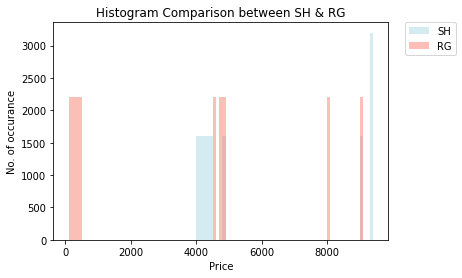

In [16]:

# Plot type 1

binning = np.arange(int(new_rg.min()), int(new_sh.max()), 100)

fig, ax = plt.subplots()
ax.hist(new_sh, color='lightblue', alpha=0.5,label="SH",bins = binning)
ax.hist(new_rg, color='salmon', alpha=0.5,label="RG", bins = binning)

ax.set(title='Histogram Comparison between SH & RG', xlabel = 'Price', ylabel='No. of occurance')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()





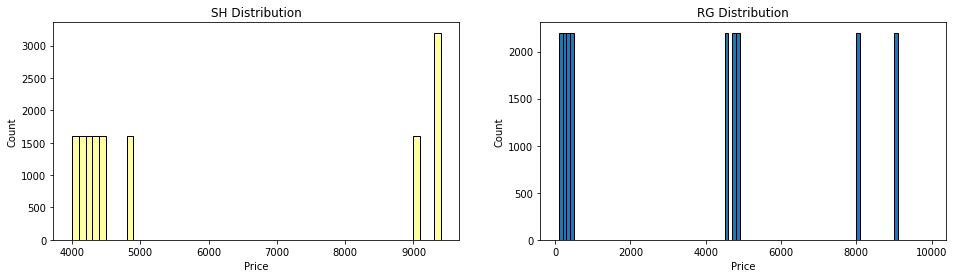

In [17]:
# Plot type 2

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

binning_SH = np.arange(int(new_sh.min()), int(new_sh.max()), 100)
binning_RG = np.arange(int(new_rg.min()), int(new_rg.max()), 100)

axes[0].hist(new_sh, edgecolor='black',color='#FFFEA3', bins = binning_SH)
axes[0].set_title('SH Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

axes[1].hist(new_rg,edgecolor='black', bins = binning_RG)
axes[1].set_title('RG Distribution')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Count')

plt.show()

In [19]:
#2nd scenario

RG_2= np.array([100,200,300,400,3000,6200,7000,7100,7700,10000])
SH_2= np.array([3500,3900,4000,4400,4500,4700,9300,9400,9500,9800])

sec_rg,sec_sh=create_lists(RG_2,SH_2)


In [21]:
# Results:
print(f'SH_sample size is: {len(sec_sh)}')
print(f'SH_sample mean is: {sec_sh.mean()}')
print(f'SH_sample median is: {statistics.median(sec_sh)}')
print(f'SH_sample IQR is: {iqr(sec_sh)}')

print('#############################################################')
print(f'RG_sample size is: {len(sec_rg)}')
print(f'RG_sample mean is: {np.ceil(sec_rg.mean())}')
print(f'RG_sample median is: {statistics.median(sec_rg)}')
print(f'RG_sample IQR is: {iqr(sec_rg)}')


SH_sample size is: 16000
SH_sample mean is: 6300.0
SH_sample median is: 4600.0
SH_sample IQR is: 5400.0
#############################################################
RG_sample size is: 22000
RG_sample mean is: 4200.0
RG_sample median is: 4600.0
RG_sample IQR is: 6800.0


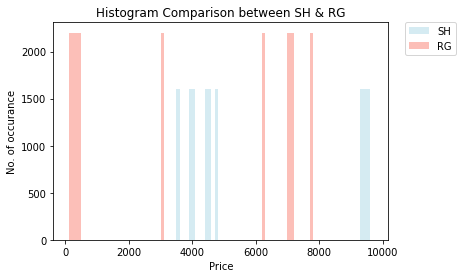

In [22]:

# Plot type 1

binning = np.arange(int(sec_rg.min()), int(sec_sh.max()), 100)
fig, ax = plt.subplots()

ax.hist(sec_sh, color='lightblue', alpha=0.5,label="SH", bins = binning)
ax.hist(sec_rg, color='salmon', alpha=0.5,label="RG", bins = binning)

ax.set(title='Histogram Comparison between SH & RG', xlabel = 'Price', ylabel='No. of occurance')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


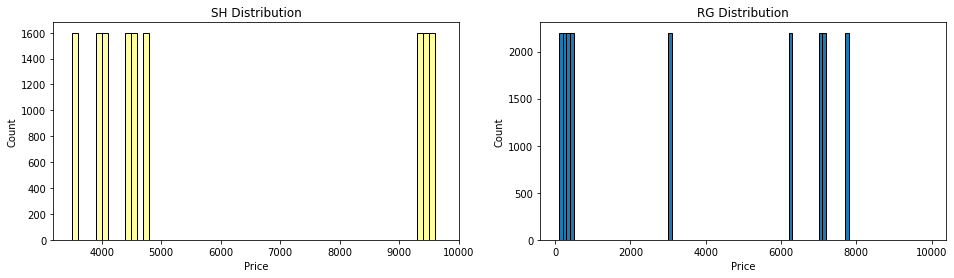

In [23]:
# Plot type 2

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

binning_SH = np.arange(int(sec_sh.min()), int(sec_sh.max()), 100)
binning_RG = np.arange(int(sec_rg.min()), int(sec_rg.max()), 100)

axes[0].hist(sec_sh, edgecolor='black',color='#FFFEA3', bins=binning_SH)
axes[0].set_title('SH Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

axes[1].hist(sec_rg,edgecolor='black',bins=binning_RG)
axes[1].set_title('RG Distribution')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Count')

plt.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [24]:
# Conducting SH_sample with higher Var than RG

SH_sample =np.array([4_100,4_200,4_300,4_400,4_450,
                     4_500,4_600,4_600,4_700,
                     7_000,9_000,10_000,11_000,14_000])

SH_copy= np.copy(SH_sample)


for i in range(1):
    temp_1 = np.array([SH_copy[i]]*10)
    temp_2 = np.array([SH_copy[i+13]]*10)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+1]]*19)
    temp_2 = np.array([SH_copy[i+12]]*19)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+2]]*3)
    temp_2 = np.array([SH_copy[i+11]]*3)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+3]]*4)
    temp_2 = np.array([SH_copy[i+10]]*4)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)
    
for i in range(1):
    temp_1 = np.array([SH_copy[i+4]]*9)
    temp_2 = np.array([SH_copy[i+9]]*9)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+5]]*19)
    temp_2 = np.array([SH_copy[i+8]]*19)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+6]]*9)
    temp_2 = np.array([SH_copy[i+7]]*9)
    temp = np.append(temp_1,temp_2)
    SH_sample = np.append(SH_sample,temp)


SH_sample = np.sort(SH_sample)
    
SH_sample_big = np.repeat(SH_sample,100)
gap = np.sum(SH_sample_big)-6_300*len(SH_sample_big)
number_of_md = 20*100
addition = gap/(len(SH_sample_big)-number_of_md)


for i in range(len(SH_sample_big)):
    if SH_sample_big[i] != 4_600:
        SH_sample_big[i]-=addition

In [25]:
# Conducting RG_sample with lower Var than SH

RG_sample =np.array([600,700,800,900,1_000,1_200,1_300,1_500,1_600,
                     4_600,4_600,4_700,4_800,4_900,5_000,5_100,5_200,5_300,5_400,10_000])
RG_copy = np.copy(RG_sample)

for i in range(3):
    temp_1 = np.array([RG_copy[i]]*24)
    temp_2 = np.array([RG_copy[i+17]]*24)
    temp = np.append(temp_1,temp_2)
    RG_sample = np.append(RG_sample,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+3]]*44)
    temp_2 = np.array([RG_copy[i+15]]*44)
    temp = np.append(temp_1,temp_2)
    RG_sample = np.append(RG_sample,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+5]]*12)
    temp_2 = np.array([RG_copy[i+13]]*11)
    temp = np.append(temp_1,temp_2)
    RG_sample = np.append(RG_sample,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+7]]*9)
    temp_2 = np.array([RG_copy[i+11]]*9)
    temp = np.append(temp_1,temp_2)
    RG_sample = np.append(RG_sample,temp)
    
for i in range(1):
    temp_1 = np.array([RG_copy[i+9]]*9)
    temp_2 = np.array([RG_copy[i+10]]*9)
    temp = np.append(temp_1,temp_2)
    RG_sample = np.append(RG_sample,temp)

    
RG_sample = np.sort(RG_sample)
RG_sample_big = np.repeat(RG_sample,50)

gap = 4_200*len(RG_sample_big) - np.sum(RG_sample_big)
number_of_md = 10*100
addition = gap/(len(RG_sample_big)-number_of_md)

for i in range(len(RG_sample_big)):
      if RG_sample_big[i] != 4_600:
        RG_sample_big[i]+=addition

In [27]:
# #Results:

print(f'SH_sample sample size is: {len(SH_sample_big)}')
print(f'SH_sample mean is: {SH_sample_big.mean()}')
print(f'SH_sample median is: {statistics.median(SH_sample_big)}')
print(f'SH_sample STD is: {np.std(SH_sample_big)}')
print(f'SH_sample IQR is: {iqr(SH_sample_big)}')
print(f'SH_sample Variance is: {np.var(SH_sample_big)}')
print('#############################################################')
print(f'RG_sample sample size is: {len(RG_sample_big)}')
print(f'RG_sample mean is: {np.ceil(RG_sample_big.mean())}')
print(f'RG_sample median is: {statistics.median(RG_sample_big)}')
print(f'RG_sample STD is: {np.std(RG_sample_big)}')
print(f'RG_sample IQR is: {iqr(RG_sample_big)}')
print(f'RG_sample Variance is: {np.var(RG_sample_big)}')

#  We can see that avriance of SH> variance of RG

SH_sample sample size is: 16000
SH_sample mean is: 6300.0
SH_sample median is: 4600.0
SH_sample STD is: 3130.6638672971585
SH_sample IQR is: 3062.5
SH_sample Variance is: 9801056.25
#############################################################
RG_sample sample size is: 22000
RG_sample mean is: 4200.0
RG_sample median is: 4600.0
RG_sample STD is: 2579.0839839526343
RG_sample IQR is: 4300.0
RG_sample Variance is: 6651674.196280992


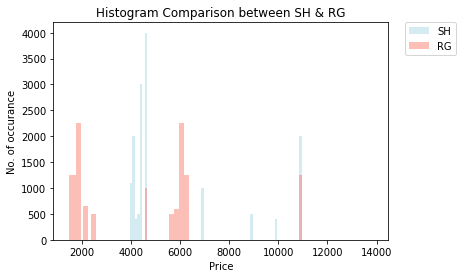

In [28]:
# Plot type 1

binning = np.arange(int(RG_sample_big.min()), int(SH_sample_big.max()), 100)
fig, ax = plt.subplots()


ax.hist(SH_sample_big, color='lightblue', alpha=0.5,label="SH", bins=binning)
ax.hist(RG_sample_big, color='salmon', alpha=0.5,label="RG", bins=binning)

ax.set(title='Histogram Comparison between SH & RG', xlabel = 'Price', ylabel='No. of occurance')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

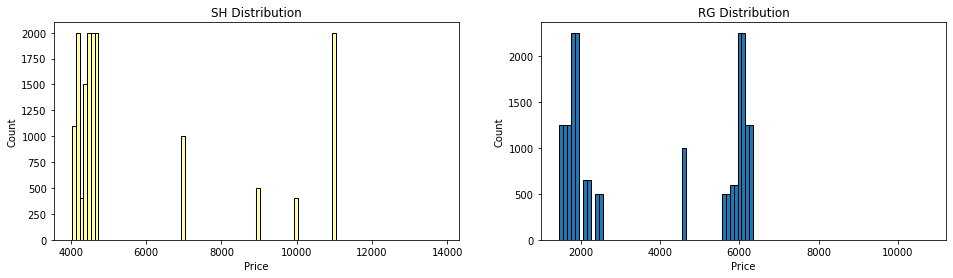

In [29]:
# Plot type 2

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

binning_SH = np.arange(int(SH_sample_big.min()), int(SH_sample_big.max()), 100)
binning_RG = np.arange(int(RG_sample_big.min()), int(RG_sample_big.max()), 100)

axes[0].hist(SH_sample_big, edgecolor='black',color='#FFFEA3', bins =binning_SH )
axes[0].set_title('SH Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

axes[1].hist(RG_sample_big,edgecolor='black', bins =binning_RG)
axes[1].set_title('RG Distribution')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Count')

plt.show()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [33]:
#SH_PHI_sample

SH_rent =np.array([10_000, 11_100, 11_400, 11_600,
       11_700, 11_800, 12_000, 12_000,
       16_000, 16_500, 21_000, 22_700,
       24_700, 30_000])

SH_copy= np.copy(SH_rent)


for i in range(1):
    temp_1 = np.array([SH_copy[i]]*10)
    temp_2 = np.array([SH_copy[i+13]]*10)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+1]]*19)
    temp_2 = np.array([SH_copy[i+12]]*19)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+2]]*3)
    temp_2 = np.array([SH_copy[i+11]]*3)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+3]]*4)
    temp_2 = np.array([SH_copy[i+10]]*4)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)
    
for i in range(1):
    temp_1 = np.array([SH_copy[i+4]]*9)
    temp_2 = np.array([SH_copy[i+9]]*9)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+5]]*19)
    temp_2 = np.array([SH_copy[i+8]]*19)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

for i in range(1):
    temp_1 = np.array([SH_copy[i+6]]*9)
    temp_2 = np.array([SH_copy[i+7]]*9)
    temp = np.append(temp_1,temp_2)
    SH_rent = np.append(SH_rent,temp)

SH_rent = np.sort(SH_rent)
    
SH_rent_big = np.repeat(SH_rent,100)
gap = np.sum(SH_rent_big)-12_500*len(SH_rent_big)
number_of_md = 20*100
addition = gap/(len(SH_rent_big)-number_of_md)
addition

for i in range(len(SH_rent_big)):
    if SH_rent_big[i] != 12_000:
        SH_rent_big[i]-=addition


# ##############################################################################################################
# ##############################################################################################################

# #Results:

print(f'SH_rent rent size is: {len(SH_rent_big)}')
print(f'SH_rent mean is: {SH_rent_big.mean()}')
print(f'SH_rent median is: {statistics.median(SH_rent_big)}')
print(f'SH_rent STD is: {np.std(SH_rent_big)}')
print(f'SH_rent correlation with SH_sample: {pearsonr(SH_rent_big,SH_sample_big)}')


SH_rent rent size is: 16000
SH_rent mean is: 12500.0
SH_rent median is: 12000.0
SH_rent STD is: 5893.612007928585
SH_rent correlation with SH_sample: (0.9609386289181789, 0.0)


In [35]:
#RG_PHI_sample

RG_rent =np.array([2_000,  2_500,  3_000,  5_500 ,
        6_000,  6_500, 7_500,  7_500,
        8_000,  8000,  8000,  8_000,
        10_000,  11_000,  11_500,  12_000,
        13_000,  15_500,  15_000, 16_500])
RG_copy = np.copy(RG_rent)

for i in range(3):
    temp_1 = np.array([RG_copy[i]]*34)
    temp_2 = np.array([RG_copy[i+17]]*34)
    temp = np.append(temp_1,temp_2)
    RG_rent = np.append(RG_rent,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+3]]*24)
    temp_2 = np.array([RG_copy[i+15]]*24)
    temp = np.append(temp_1,temp_2)
    RG_rent = np.append(RG_rent,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+5]]*12)
    temp_2 = np.array([RG_copy[i+13]]*11)
    temp = np.append(temp_1,temp_2)
    RG_rent = np.append(RG_rent,temp)

for i in range(2):
    temp_1 = np.array([RG_copy[i+7]]*14)
    temp_2 = np.array([RG_copy[i+11]]*14)
    temp = np.append(temp_1,temp_2)
    RG_rent = np.append(RG_rent,temp)
    
for i in range(1):
    temp_1 = np.array([RG_copy[i+9]]*9)
    temp_2 = np.array([RG_copy[i+10]]*9)
    temp = np.append(temp_1,temp_2)
    RG_rent = np.append(RG_rent,temp)

    
RG_rent = np.sort(RG_rent)

RG_rent_big = np.repeat(RG_rent,50)

gap = 8_500*len(RG_rent_big) - np.sum(RG_rent_big)
number_of_md = 25*100
addition = gap/(len(RG_rent_big)-number_of_md)


counter = 0
for i in range(len(RG_rent_big)):
      if RG_rent_big[i] != 8_000:
        RG_rent_big[i]+=addition
        counter +=1
        
        
##############################################################################################################
##############################################################################################################

#Results:

print(f'RG_rent rent size is: {len(RG_rent_big)}')
print(f'RG_rent mean is: {np.ceil(RG_rent_big.mean())}')
print(f'RG_rent median is: {statistics.median(RG_rent_big)}')
print(f'RG_rent STD is: {np.std(RG_rent_big)}')
print(f'RG_rent Variance is: {np.var(RG_rent_big)}')
print(f'RG_rent correlation with RG_sample: {pearsonr(RG_rent_big,RG_sample_big)}')
print(f'RG_sample IQR is: {iqr(RG_rent_big)}')
print('##########################################3')

print(f'SH_rent rent size is: {len(SH_rent_big)}')
print(f'SH_rent mean is: {np.ceil(SH_rent_big.mean())}')
print(f'SH_rent median is: {statistics.median(SH_rent_big)}')
print(f'SH_rent STD is: {np.std(SH_rent_big)}')
print(f'SH_rent Variance is: {np.var(SH_rent_big)}')
print(f'SH_sample IQR is: {iqr(SH_rent_big)}')
print(f'SH_rent correlation with SH_sample: {pearsonr(SH_rent_big,SH_sample_big)}')


RG_rent rent size is: 22000
RG_rent mean is: 8500.0
RG_rent median is: 8000.0
RG_rent STD is: 4911.095823489906
RG_rent Variance is: 24118862.1875
RG_rent correlation with RG_sample: (0.8959076030410862, 0.0)
RG_sample IQR is: 7500.0
##########################################3
SH_rent rent size is: 16000
SH_rent mean is: 12500.0
SH_rent median is: 12000.0
SH_rent STD is: 5893.612007928585
SH_rent Variance is: 34734662.5
SH_sample IQR is: 5950.0
SH_rent correlation with SH_sample: (0.9609386289181789, 0.0)


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

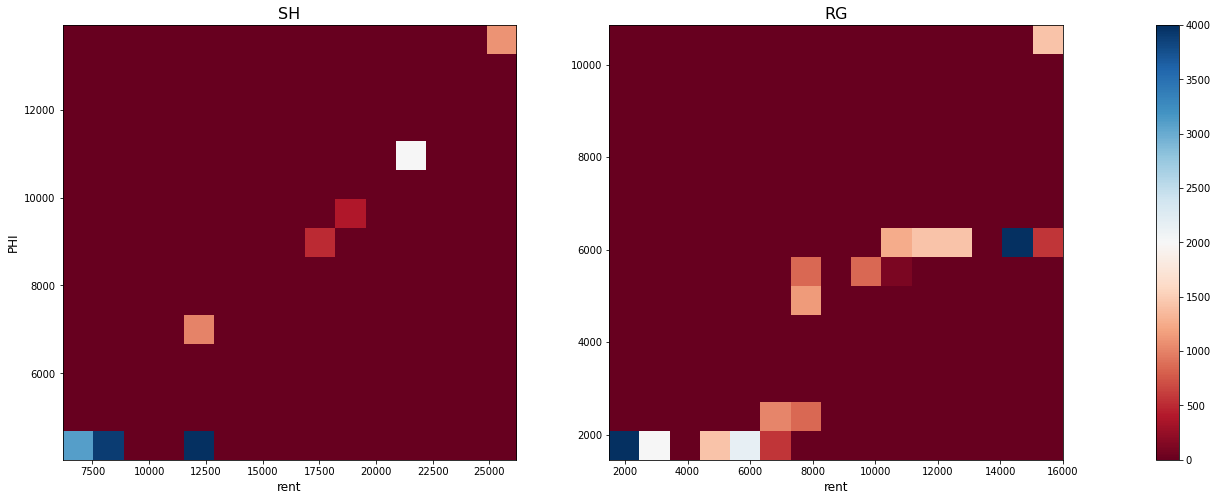

In [36]:

#Plotting heatmaps

heatmap1, xedges1, yedges1 = np.histogram2d( SH_rent_big,SH_sample_big, bins=15)
heatmap2, xedges2, yedges2 = np.histogram2d( RG_rent_big,RG_sample_big, bins=15)
extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]]
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(20,8), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]})
fig.subplots_adjust(wspace=0.3)
im  = ax.imshow(heatmap1.T,extent=extent1, origin='lower',cmap='RdBu',aspect="auto")
im2 = ax2.imshow(heatmap2.T,extent=extent2, origin='lower',cmap='RdBu',aspect="auto")
ax.set_title('SH', fontsize = 16)
ax.set_ylabel("PHI",fontsize = 12)
ax.set_xlabel("rent",fontsize = 12)

ax2.set_title('RG', fontsize = 16)
ax2.set_xlabel("rent",fontsize = 12)

fig.colorbar(im, cax=cax)

plt.show()

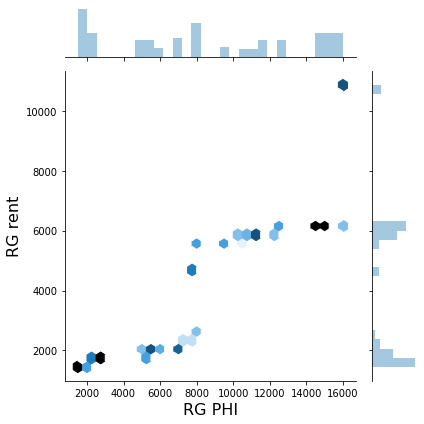

In [37]:
# Jointplot RG
h = sns.jointplot(x=RG_rent_big, y=RG_sample_big, kind='hex')
h.set_axis_labels('RG PHI', 'RG rent', fontsize = 16)
plt.tight_layout()


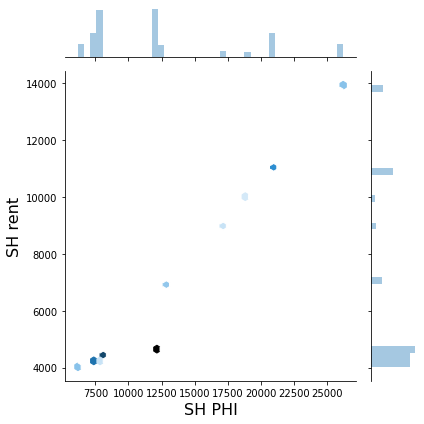

In [38]:
# Jointplot SH
s = sns.jointplot(x=SH_rent_big, y=SH_sample_big, kind='hex')
s.set_axis_labels('SH PHI', 'SH rent', fontsize = 16)
plt.tight_layout()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

Var(X+Y+Z) = Var((X+Y)+Z) = Var(X+Y) + Var(Z) + 2Cov(X+Y,Z) = Var(X) + Var(Y) + 2Cov(X,Y) + Var(Z) + 2*E[(X+Y-μ(x+y))(Z-μz)]

#Now let's ake a ok at the last part only:
E[(X+Y-μ(x+y))(Z-μz)] = E[(X-μx)(Z-μz) + (Y-μy)(Z-μz)] = Cov(X,Z) + Cov(Y+Z)

# After aggregating all:
Var(X+Y+Z) = Var(X) + Var(Y) + 2Cov(X,Y) + Var(Z) +2(Cov(X,Z) + Cov(Y+Z))

# After arranging:
Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2Cov(X,Y) + 2Cov(X,Z) + 2Cov(Y+Z)

# If X,Y,Z are pairwise independent:
for every (a,b) s.t. (a,b) = (X,Y),(X,Z),(Y,Z):
    Cov(a,b) = 0
    
Thus,
Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z)


They are not necessarily collectively independet!
The occurance of X can not reflect on the occurance of Z and Y, each one of them bytemselves.
However, the occurance of Z and Y at the same time can have an influance on X (X can be replaced with Y or Z)

Simple example:
    Rolling 2 dices
    3 events:
        A. The sum of dices = 7. P(A) = 1/6
        B. The #1 dice is 3. P(B) = 1/6
        C. The #2 dice is 4. P(B) = 1/6
    Each pair of them is independet because the P of each pair is P(A and B) = p(A)*P(B) = 1/36   (As well for C)
    However, the P of 3 of them is P(A and B and C) = P(B and C) = 1/36 whereas P(A)*P(B)*P(C) = 1/216
    

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [39]:
#  G is an empty dictionary , in G we will have all possible keys , first key in G will be the minimum value of X and Y untill maximum value of X and Y 
# for example - if X=[1,2,3] and Y=[1,2,3] then G will start in 2 (1+1) and last key will be 6 (3+3)
def convolution_calc(X,Y):
    G=defaultdict(float)

    


    for key1, value1 in X.items():
        for key2,value2 in Y.items():

            
            G[key1+key2]+=value1*value2


    return G

In [40]:
def NFoldConv(P,n):
#     I will create a temp variable in order to hold P's data , because in convolution process we will need to convolve P with itself 
    P_2=P
    
#     we are running untill n-1, because for example if we have 3 variable (x,y,z)we will need 2 convolutions 
#  1st- x*y  and 2nd will be (x*y)*z


    for i in range(n-1):
        P_2=convolution_calc(P,P_2)

    return P_2

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


 The distribution of the sum of the results of rolling a fair octahedron 17 times is Q=defaultdict(<class 'float'>, {17: 4.440892098500626e-16, 18: 7.549516567451064e-15, 19: 6.794564910705958e-14, 20: 4.303224443447107e-13, 21: 2.1516122217235534e-12, 22: 9.036771331238924e-12, 23: 3.313482821454272e-11, 24: 1.088715784192118e-10, 25: 3.2660718574106795e-10, 26: 9.07134811711785e-10, 27: 2.3577291230481023e-09, 28: 5.782673007104222e-09, 29: 1.3473395732432891e-08, 30: 2.998400727705075e-08, 31: 6.401734875538523e-08, 32: 1.3161584089260714e-07, 33: 2.613809253482202e-07, 34: 5.027422242953605e-07, 35: 9.38663699212583e-07, 36: 1.7045993589981379e-06, 37: 3.015970226893927e-06, 38: 5.206881849684208e-06, 39: 8.783168114145923e-06, 40: 1.449303744882613e-05, 41: 2.3418493098503745e-05, 42: 3.7090165106334894e-05, 43: 5.762708941681183e-05, 44: 8.790117605705916e-05, 45: 0.00013172354057466862, 46: 0.0001940465160554794, 47: 0.000281171099826949, 48: 0.00040094502474907756, 49: 0.000562

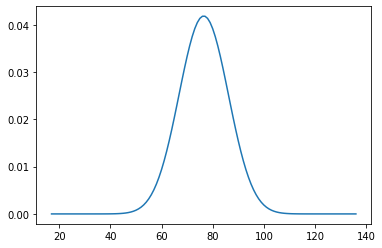

In [41]:
n=17
sides =8
octahedron_dict={}
# I will create a dictionery that will hold all probabilities for each side 
for i in range(1, sides+1):
    octahedron_dict[i]=1/sides
    
Q=NFoldConv(octahedron_dict, 17)

# vizualization
lists=sorted(Q.items())
key, val = zip(*lists)
print(' The distribution of the sum of the results of rolling a fair octahedron 17 times is Q={}'.format(Q))
plt.plot(key,val)
plt.show()

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

The distribution of the change in stock after 2 consecutive days : defaultdict(<class 'float'>, {-2: 0.09, -1: 0.09, 0: 0.1125, 1: 0.135, 2: 0.21749999999999997, 3: 0.12, 4: 0.0975, 5: 0.075, 6: 0.0625})


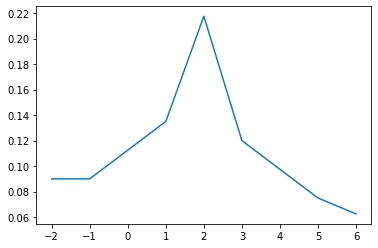

In [42]:
p_dict= {-1:0.3, 0:0.15, 1:0.15,2:0.15, 3:0.25}


#  plotting distribution of the change in stock after 2 days 
day_2=NFoldConv(p_dict,2)
print('The distribution of the change in stock after 2 consecutive days : {}'.format(day_2))
two_days=sorted(day_2.items())
key_d2, val_d2 = zip(*two_days)

plt.plot(key_d2,val_d2)


plt.show()

The distribution of the change in stock after 5 consecutive days: defaultdict(<class 'float'>, {-5: 0.00243, -4: 0.006075, -3: 0.012150000000000001, -2: 0.021262499999999997, -1: 0.038221874999999995, 0: 0.05373843749999999, 1: 0.07074843749999998, 2: 0.0872015625, 3: 0.10407656249999998, 4: 0.1071984375, 5: 0.10638843749999999, 6: 0.0996890625, 7: 0.0886078125, 8: 0.0683578125, 9: 0.05170781249999999, 10: 0.0363571875, 11: 0.023367187499999997, 12: 0.0120703125, 13: 0.0064453125, 14: 0.0029296875, 15: 0.0009765625}) 


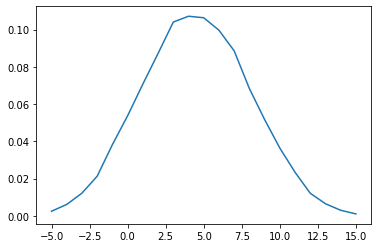

In [43]:
#  plotting distribution of the change in stock after 5 days 
day_5=NFoldConv(p_dict,5)
print('The distribution of the change in stock after 5 consecutive days: {} '.format(day_5))


five_days=sorted(day_5.items())
key_d5, val_d5 = zip(*five_days)

plt.plot(key_d5,val_d5)
plt.show()


2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

Q- What is the probability that the stock has gained strictly more than 7NIS after 5 days:

A- we calculated in the previous section  the change in stock after 5 consecutive days, in order to calculate the probabily P(x>7) after 5 days we need to sum all probabily of keys that higher than 7 - in this case we want to sum the probability of keys 8-15.


In [44]:
tot_7=0
for v,k in day_5.items():
    if v>7:
        tot_7+=k
        
print(tot_7)

0.202211875


Q-What is the probability that the stock has lost strictly more than 4NIS  after 5 days? 

A- we need to calculate the probability that we lost mora than 4 NIS after 5 days , so we are looking for P(x<-4)-> mening that we are looking for key -5 in this case .

-5=0.00243

In [45]:
tot_4=0
for v,k in day_5.items():
    if v<-4:
        tot_4+=k
        
print(tot_4)

0.00243
